In [ ]:
import pandas as pd


# Uploaded file path
file_path = 'Honey_Production_Dataset_2023.xlsx'

# Load Excel file to verify the sheets
excel_data = pd.ExcelFile(file_path)

# Show the names of the sheets
print(excel_data.sheet_names)

# Load the specific sheet in a DataFrame
sheet_name = 'Honey_Production_Dataset_2023'
data = pd.read_excel(file_path, sheet_name=sheet_name)

# Perform an operation describing how to obtain descriptive statistics
data_description = data.describe()
data_description

['Honey_Production_Dataset_2023']


,Date,Environmental Temperature (Â°C),Relative Humidity (%),Hive Temperature (Â°C),Hive Humidity (%),Wind Speed (km/h),Honey Weight (kg),Total Weight (Hive + Bees + Honey) (kg)
count,365,365.000000,365.000000,365.000000,365.000000,365.000000,365.000000,365.000000
mean,2023-07-02 00:00:00,24.862466,77.584027,32.535041,60.187452,5.248164,23.630548,48.959534
min,2023-01-01 00:00:00,18.000000,65.030000,30.020000,50.010000,0.020000,0.230000,25.230000
25%,2023-04-02 00:00:00,21.680000,71.290000,31.120000,55.000000,2.620000,11.570000,36.920000
50%,2023-07-02 00:00:00,25.160000,77.610000,32.570000,60.500000,4.950000,19.990000,45.160000
75%,2023-10-01 00:00:00,28.040000,84.110000,33.890000,65.360000,8.050000,29.930000,55.150000
max,2023-12-31 00:00:00,30.950000,89.840000,34.980000,69.920000,10.000000,69.930000,95.530000
std,NaN,3.700387,7.356519,1.519185,5.828172,2.975682,16.381982,16.488112


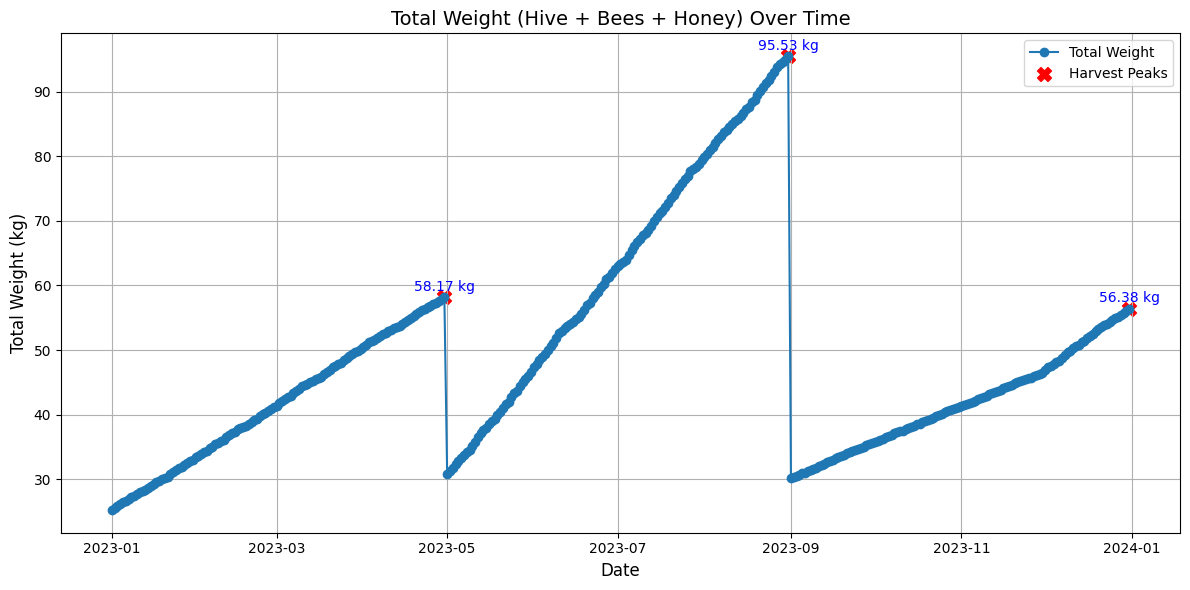

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from scipy.signal import find_peaks

# Ensure that the relevant columns are clean and correctly formatted
data['Date'] = pd.to_datetime(data['Date'], errors='coerce')
data['Total Weight (Hive + Bees + Honey) (kg)'] = pd.to_numeric(
    data['Total Weight (Hive + Bees + Honey) (kg)'], errors='coerce'
)

# Delete rows with invalid data
cleaned_data = data.dropna(subset=['Date', 'Total Weight (Hive + Bees + Honey) (kg)'])

# Finding peaks in the data
peaks, _ = find_peaks(cleaned_data['Total Weight (Hive + Bees + Honey) (kg)'])

# Check and add the December 31, 2023 peak if missing.
last_date = pd.to_datetime('2023-12-31')
if last_date in cleaned_data['Date'].values:
    # Find the index of the date December 31, 2023
    last_date_index = cleaned_data[cleaned_data['Date'] == last_date].index[0]
    peaks = list(peaks)  # Convert to list to add manually
    if last_date_index not in peaks:
        peaks.append(last_date_index)

# Calculate the amount of honey remaining for each spout
remaining_honey = cleaned_data.iloc[peaks]['Total Weight (Hive + Bees + Honey) (kg)'].values

# Plot ‘Total Weight (Hive + Bees + Honey) (kg)’ vs ‘Date’ with peaks highlighted.
plt.figure(figsize=(12, 6))
plt.plot(cleaned_data['Date'], cleaned_data['Total Weight (Hive + Bees + Honey) (kg)'],
         marker='o', linestyle='-', label='Total Weight')

# Highlight peaks with ‘X’ markers in a different color.
plt.scatter(cleaned_data.iloc[peaks]['Date'],
            cleaned_data.iloc[peaks]['Total Weight (Hive + Bees + Honey) (kg)'],
            color='red', marker='X', s=100, label='Harvest Peaks')

# Add annotations of the amount of honey remaining for each peak.
for i, peak in enumerate(peaks):
    plt.text(cleaned_data.iloc[peak]['Date'],
             cleaned_data.iloc[peak]['Total Weight (Hive + Bees + Honey) (kg)'] + 1,
             f'{remaining_honey[i]:.2f} kg',
             color='blue', fontsize=10, ha='center')

# Add titles and tags
plt.title('Total Weight (Hive + Bees + Honey) Over Time', fontsize=14)
plt.xlabel('Date', fontsize=12)
plt.ylabel('Total Weight (kg)', fontsize=12)
plt.legend()
plt.grid(True)
plt.tight_layout()

# Show the graph
plt.show()





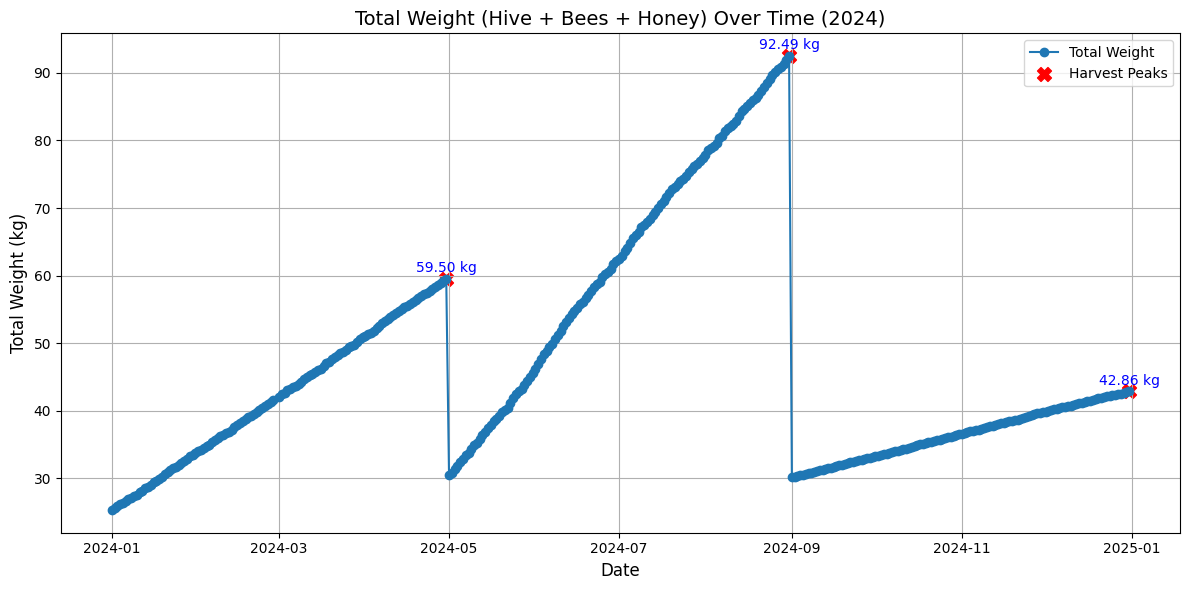

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from scipy.signal import find_peaks

# Upload Excel file
file_path = 'Honey_Production_Dataset_for_2024.xlsx'
new_data_df = pd.read_excel(file_path, sheet_name='Honey_Production_Dataset_for_20')

# Ensure that the relevant columns are clean and correctly formatted
new_data_df['Date'] = pd.to_datetime(new_data_df['Date'], errors='coerce')
new_data_df['Total Weight (Hive + Bees + Honey) (kg)'] = pd.to_numeric(
    new_data_df['Total Weight (Hive + Bees + Honey) (kg)'], errors='coerce'
)

# Delete rows with invalid data
cleaned_new_data = new_data_df.dropna(subset=['Date', 'Total Weight (Hive + Bees + Honey) (kg)'])

# Finding peaks in the data
peaks, _ = find_peaks(cleaned_new_data['Total Weight (Hive + Bees + Honey) (kg)'])

# Check and add the December 31, 2024 peak if missing.
last_date_2024 = pd.to_datetime('2024-12-31')
if last_date_2024 in cleaned_new_data['Date'].values:
    last_date_index_2024 = cleaned_new_data[cleaned_new_data['Date'] == last_date_2024].index[0]
    peaks = list(peaks)   # Convert to list to add manually
    if last_date_index_2024 not in peaks:
        peaks.append(last_date_index_2024)

# Calculate the amount of honey remaining for each spout
remaining_honey_2024 = cleaned_new_data.iloc[peaks]['Total Weight (Hive + Bees + Honey) (kg)'].values

# Plot ‘Total Weight (Hive + Bees + Honey) (kg)’ vs ‘Date’ with peaks highlighted.
plt.figure(figsize=(12, 6))
plt.plot(cleaned_new_data['Date'], cleaned_new_data['Total Weight (Hive + Bees + Honey) (kg)'],
         marker='o', linestyle='-', label='Total Weight')

# Highlight peaks with ‘X’ markers in a different color.
plt.scatter(cleaned_new_data.iloc[peaks]['Date'],
            cleaned_new_data.iloc[peaks]['Total Weight (Hive + Bees + Honey) (kg)'],
            color='red', marker='X', s=100, label='Harvest Peaks')

# Add annotations of the amount of total weight at each peak
for i, peak in enumerate(peaks):
    plt.text(cleaned_new_data.iloc[peak]['Date'],
             cleaned_new_data.iloc[peak]['Total Weight (Hive + Bees + Honey) (kg)'] + 1,
             f'{remaining_honey_2024[i]:.2f} kg',
             color='blue', fontsize=10, ha='center')

# Add titles and tags
plt.title('Total Weight (Hive + Bees + Honey) Over Time (2024)', fontsize=14)
plt.xlabel('Date', fontsize=12)
plt.ylabel('Total Weight (kg)', fontsize=12)
plt.legend()
plt.grid(True)
plt.tight_layout()

# Show the graph
plt.show()


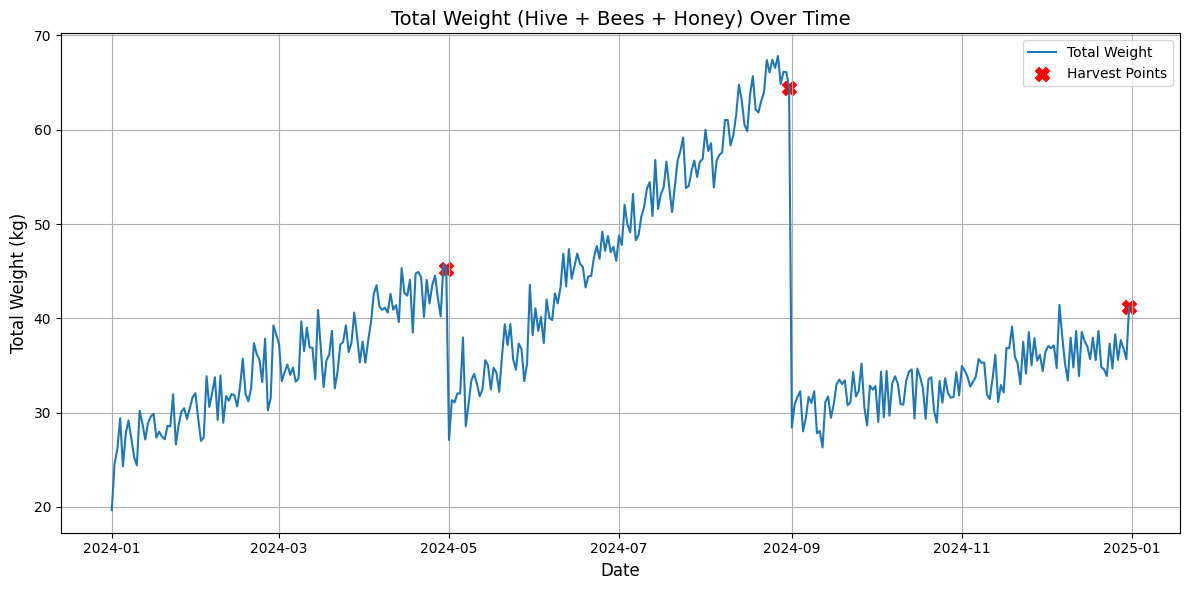

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from scipy.signal import find_peaks

# Load the Excel file with the noisy dataset
file_path = '/content/Honey_Production_Noisy_Dataset_2024.xlsx'
noisy_dataset_df = pd.read_excel(file_path)

# Ensure that the relevant columns are clean and correctly formatted
noisy_dataset_df['Date'] = pd.to_datetime(noisy_dataset_df['Date'], errors='coerce')
noisy_dataset_df['Total Weight (Hive + Bees + Honey) (kg)'] = pd.to_numeric(
    noisy_dataset_df['Total Weight (Hive + Bees + Honey) (kg)'], errors='coerce'
)

# Delete rows with invalid data
cleaned_noisy_dataset = noisy_dataset_df.dropna(subset=['Date', 'Total Weight (Hive + Bees + Honey) (kg)'])

# Filter the harvest points (every 4 months) where “Extract Honey” is True.
harvest_data = cleaned_noisy_dataset[cleaned_noisy_dataset['Extract Honey'] == True]

# Graphing noisy data
plt.figure(figsize=(12, 6))
plt.plot(cleaned_noisy_dataset['Date'], cleaned_noisy_dataset['Total Weight (Hive + Bees + Honey) (kg)'],
         linestyle='-', label='Total Weight')

# Highlight harvesting points with red ‘X’ markers
plt.scatter(harvest_data['Date'], harvest_data['Total Weight (Hive + Bees + Honey) (kg)'],
            color='red', marker='X', s=100, label='Harvest Points')

# Add titles, labels and captions
plt.title('Total Weight (Hive + Bees + Honey) Over Time', fontsize=14)
plt.xlabel('Date', fontsize=12)
plt.ylabel('Total Weight (kg)', fontsize=12)
plt.legend()
plt.grid(True)
plt.tight_layout()

# Show the graph
plt.show()


In [ ]:
!pip install pygad

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 86.8/86.8 kB 4.0 MB/s eta 0:00:00


In [ ]:
import pygad
import numpy as np

# Define the fitness equation based on the regression model
def fitness_function(ga_instance, solution, solution_idx):
    # The variables are: ET, RH, HT, HH, WS.
    ET, RH, HT, HH, WS = solution
    # Regression equation
    HW = 264.54 + (0.99 * ET) - (4.55 * RH) + (0.67 * HT) + (0.98 * HH) - (0.57 * WS)
    # Maximize honey production (HW)
    return HW

# Define the range of values for each variable (based on the original data).
variable_ranges = {
    "ET": (23, 32),  # Environmental Temperature (°C)
    "RH": (70, 80),  # Relative Humidity (%)
    "HT": (25, 36),  # Hive Temperature (°C)
    "HH": (58, 70),  # Hive Humidity (%)
    "WS": (7, 16),   # Wind Speed (km/h)
}

# Set the range of each variable in the problem
gene_space = [
    {"low": variable_ranges["ET"][0], "high": variable_ranges["ET"][1]},
    {"low": variable_ranges["RH"][0], "high": variable_ranges["RH"][1]},
    {"low": variable_ranges["HT"][0], "high": variable_ranges["HT"][1]},
    {"low": variable_ranges["HH"][0], "high": variable_ranges["HH"][1]},
    {"low": variable_ranges["WS"][0], "high": variable_ranges["WS"][1]},
]

# Set up the genetic algorithm
ga_instance = pygad.GA(
    num_generations=200,                 # Number of generations
    num_parents_mating=5,                # Number of parents selected per generation
    fitness_func=fitness_function,       # Fitness function
    sol_per_pop=10,                      # Number of solutions per population
    num_genes=len(gene_space),           # Number of variables
    gene_space=gene_space,               # Gene space
    parent_selection_type="sss",         # Parent selection
    crossover_type="single_point",       # Type of crossover
    mutation_type="random",              # Type of mutation
    mutation_percent_genes=10            # Percentage of mutated genes
)

# Run the genetic algorithm
ga_instance.run()

# Obtain the best solution
solution, solution_fitness, solution_idx = ga_instance.best_solution()

# Show results
optimal_values = {
    "Environmental Temperature (ET)": solution[0],
    "Relative Humidity (RH)": solution[1],
    "Hive Temperature (HT)": solution[2],
    "Hive Humidity (HH)": solution[3],
    "Wind Speed (WS)": solution[4],
    "Optimal Honey Weight (HW)": solution_fitness
}

# Show results
import pandas as pd
optimal_values_df = pd.DataFrame(optimal_values, index=[0])
print(optimal_values_df)






   Environmental Temperature (ET)  Relative Humidity (RH)  \
0                       31.998872               70.004383   

   Hive Temperature (HT)  Hive Humidity (HH)  Wind Speed (WS)  \
0              35.968982           69.981253         7.002469   

   Optimal Honey Weight (HW)  
0                   66.38838  


/usr/local/lib/python3.11/dist-packages/pygad/pygad.py:744: UserWarning: The percentage of genes to mutate (mutation_percent_genes=10) resulted in selecting (0) genes. The number of genes to mutate is set to 1 (mutation_num_genes=1).
If you do not want to mutate any gene, please set mutation_type=None.
  warnings.warn(f"The percentage of genes to mutate (mutation_percent_genes={mutation_percent_genes}) resulted in selecting ({mutation_num_genes}) genes. The number of genes to mutate is set to 1 (mutation_num_genes=1).\nIf you do not want to mutate any gene, please set mutation_type=None.")


In [ ]:
import numpy as np

# Problem configuration
variable_ranges = {
    "ET": (23, 32),  # Environmental Temperature (°C)
    "RH": (70, 80),  # Relative Humidity (%)
    "HT": (25, 36),  # Hive Temperature (°C)
    "HH": (58, 70),  # Hive Humidity (%)
    "WS": (7, 16),   # Wind Speed (km/h)
}

# Variables and their limits
variables = list(variable_ranges.keys())
ranges = np.array([variable_ranges[var] for var in variables])

# Parameters of the Ant Colony Algorithm
num_ants = 20
num_iterations = 100
pheromone = np.ones((num_ants, len(variables)))  ## Initial pheromones
pheromone_decay = 0.1
pheromone_boost = 5

# Fitness function
def fitness_function(solution):
    ET, RH, HT, HH, WS = solution
    HW = 264.54 + (0.99 * ET) - (4.55 * RH) + (0.67 * HT) + (0.98 * HH) - (0.57 * WS)
    return HW

# Generate initial solutions
def generate_solutions(num_ants, ranges):
    return np.random.uniform(low=ranges[:, 0], high=ranges[:, 1], size=(num_ants, ranges.shape[0]))

# Execute ACO
best_solution = None
best_fitness = float('-inf')

for iteration in range(num_iterations):
    # Generate solutions for all ants
    solutions = generate_solutions(num_ants, ranges)

    # Evaluate fitness for each solution
    fitness_values = np.array([fitness_function(solution) for solution in solutions])

    # Update the best solution found
    max_fitness_idx = np.argmax(fitness_values)
    if fitness_values[max_fitness_idx] > best_fitness:
        best_fitness = fitness_values[max_fitness_idx]
        best_solution = solutions[max_fitness_idx]

    # Update pheromones
    pheromone *= (1 - pheromone_decay)  # Pheromone decomposition
    for idx, solution in enumerate(solutions):
        pheromone[idx] += pheromone_boost * (fitness_values[idx] / best_fitness)  # Pheromone reinforcement

# Show optimal results
optimal_values = {
    "Environmental Temperature (ET)": best_solution[0],
    "Relative Humidity (RH)": best_solution[1],
    "Hive Temperature (HT)": best_solution[2],
    "Hive Humidity (HH)": best_solution[3],
    "Wind Speed (WS)": best_solution[4],
    "Optimal Honey Weight (HW)": best_fitness
}

# Show results
import pandas as pd
optimal_values_df = pd.DataFrame(optimal_values, index=[0])
print(optimal_values_df)


   Environmental Temperature (ET)  Relative Humidity (RH)  \
0                       31.940102               70.123972   

   Hive Temperature (HT)  Hive Humidity (HH)  Wind Speed (WS)  \
0              31.089956           69.976629          8.63623   

   Optimal Honey Weight (HW)  
0                  61.581344  


In [ ]:
import numpy as np

# Problem configuration
variable_ranges = {
    "ET": (23, 32),  # Environmental Temperature (°C)
    "RH": (70, 80),  # Relative Humidity (%)
    "HT": (25, 36),  # Hive Temperature (°C)
    "HH": (58, 70),  # Hive Humidity (%)
    "WS": (7, 16),   # Wind Speed (km/h)
}

# Variables and their limits
variables = list(variable_ranges.keys())
ranges = np.array([variable_ranges[var] for var in variables])

# Bee Colony Algorithm Parameters
num_bees = 30
num_iterations = 100
num_employed_bees = num_bees // 2
num_onlooker_bees = num_bees // 2
limit = 10  # Limit of attempts without improvement to abandon the solution

# Fitness function
def fitness_function(solution):
    ET, RH, HT, HH, WS = solution
    HW = 264.54 + (0.99 * ET) - (4.55 * RH) + (0.67 * HT) + (0.98 * HH) - (0.57 * WS)
    return HW

# Generate initial solutions
def generate_solutions(num_bees, ranges):
    return np.random.uniform(low=ranges[:, 0], high=ranges[:, 1], size=(num_bees, ranges.shape[0]))

# Initialize the bees
solutions = generate_solutions(num_bees, ranges)
fitness_values = np.array([fitness_function(solution) for solution in solutions])
trial_counters = np.zeros(num_bees)

# Running the bee colony algorithm
for iteration in range(num_iterations):
    # Employed Bee Phase
    for i in range(num_employed_bees):
        candidate = solutions[i] + np.random.uniform(-1, 1, size=solutions[i].shape)
        candidate = np.clip(candidate, ranges[:, 0], ranges[:, 1])
        candidate_fitness = fitness_function(candidate)
        if candidate_fitness > fitness_values[i]:
            solutions[i] = candidate
            fitness_values[i] = candidate_fitness
            trial_counters[i] = 0
        else:
            trial_counters[i] += 1

    # Onlooker Bee Phase
    employed_fitness = fitness_values[:num_employed_bees]
    employed_fitness = employed_fitness - np.min(employed_fitness)  # Ensure that all fitness is positive
    if np.sum(employed_fitness) == 0:  # Avoid divisions by zero
        probabilities = np.ones(num_employed_bees) / num_employed_bees
    else:
        probabilities = employed_fitness / np.sum(employed_fitness)

    for i in range(num_onlooker_bees):
        selected_bee = np.random.choice(range(num_employed_bees), p=probabilities)
        candidate = solutions[selected_bee] + np.random.uniform(-1, 1, size=solutions[selected_bee].shape)
        candidate = np.clip(candidate, ranges[:, 0], ranges[:, 1])
        candidate_fitness = fitness_function(candidate)
        if candidate_fitness > fitness_values[selected_bee]:
            solutions[selected_bee] = candidate
            fitness_values[selected_bee] = candidate_fitness
            trial_counters[selected_bee] = 0
        else:
            trial_counters[selected_bee] += 1

    # Scout Bee Phase
    for i in range(num_bees):
        if trial_counters[i] > limit:
            solutions[i] = generate_solutions(1, ranges)[0]
            fitness_values[i] = fitness_function(solutions[i])
            trial_counters[i] = 0

# Obtain the best solution
best_index = np.argmax(fitness_values)
best_solution = solutions[best_index]
best_fitness = fitness_values[best_index]

# Show optimal results
optimal_values = {
    "Environmental Temperature (ET)": best_solution[0],
    "Relative Humidity (RH)": best_solution[1],
    "Hive Temperature (HT)": best_solution[2],
    "Hive Humidity (HH)": best_solution[3],
    "Wind Speed (WS)": best_solution[4],
    "Optimal Honey Weight (HW)": best_fitness
}

# Show results
import pandas as pd
optimal_values_df = pd.DataFrame(optimal_values, index=[0])
print(optimal_values_df)




   Environmental Temperature (ET)  Relative Humidity (RH)  \
0                       31.814918                    70.0   

   Hive Temperature (HT)  Hive Humidity (HH)  Wind Speed (WS)  \
0              35.581919                70.0        12.894729   

   Optimal Honey Weight (HW)  
0                  62.626659  


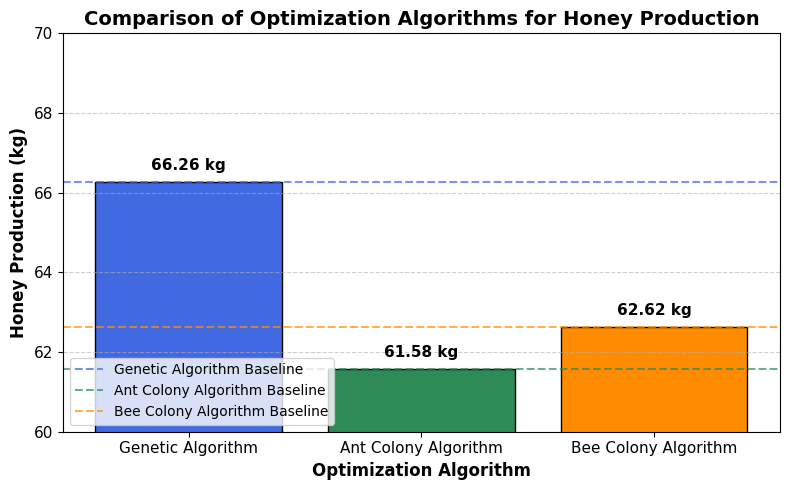

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Model data
models = ["Genetic Algorithm", "Ant Colony Algorithm", "Bee Colony Algorithm"]
hw_values = [66.26, 61.58, 62.62]  # Honey production in kg for each model

# Create the graphic with a more professional and scientific approach
plt.figure(figsize=(8, 5))
bars = plt.bar(models, hw_values, color=['royalblue', 'seagreen', 'darkorange'], edgecolor='black')

# Configuration of the graph
plt.xlabel("Optimization Algorithm", fontsize=12, fontweight='bold')
plt.ylabel("Honey Production (kg)", fontsize=12, fontweight='bold')
plt.title("Comparison of Optimization Algorithms for Honey Production", fontsize=14, fontweight='bold')
plt.ylim(60, 70)
plt.grid(axis="y", linestyle="--", alpha=0.6)

# Add reference lines
plt.axhline(y=66.26, color='royalblue', linestyle="--", alpha=0.7, label="Genetic Algorithm Baseline")
plt.axhline(y=61.58, color='seagreen', linestyle="--", alpha=0.7, label="Ant Colony Algorithm Baseline")
plt.axhline(y=62.62, color='darkorange', linestyle="--", alpha=0.7, label="Bee Colony Algorithm Baseline")

# Display the values above the bars with better formatting
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, height + 0.3, f"{height:.2f} kg",
             ha='center', fontsize=11, fontweight='bold', color='black')

# Add caption and improve design
plt.legend(fontsize=10, loc="lower left", frameon=True)
plt.xticks(fontsize=11)
plt.yticks(fontsize=11)
plt.tight_layout()

# Show the enhanced graph
plt.show()



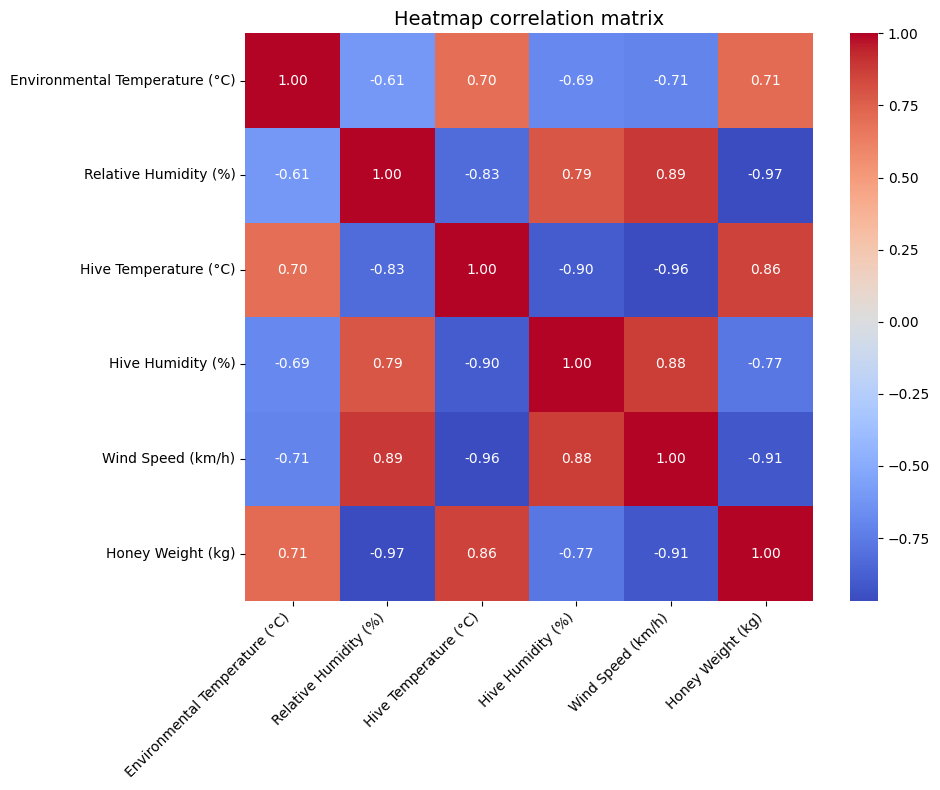

In [ ]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Create the DataFrame based on the data provided
data = {

    "Environmental Temperature (°C)": [26.83, 30.01, 27.04, 28.06, 31.02, 25.28, 24.52, 24.19, 23.71],
    "Relative Humidity (%)": [75.55, 70.23, 74.81, 73.55, 72.32, 74.87, 76.86, 71.35, 77.26],
    "Hive Temperature (°C)": [34.52, 35.48, 31.3, 33.99, 35.15, 28.28, 26.38, 34.89, 25.12],
    "Hive Humidity (%)": [60.73, 58.64, 60.24, 59.69, 59.25, 62.58, 69.64, 60.14, 66.68],
    "Wind Speed (km/h)": [9.99, 7.11, 9.63, 9.12, 8.19, 12.88, 13.58, 8.01, 15.87],
    "Honey Weight (kg)": [24.52, 53.57, 26.58, 30.78, 41.98, 17.8, 15.69, 41.12, 12.14],
}

df = pd.DataFrame(data)

# Calculate the correlation matrix
correlation_matrix = df.corr()

# Setting the chart size
plt.figure(figsize=(10, 8))

# Create a heatmap for the correlation matrix
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap="coolwarm", cbar=True, square=True)

# Titles and labels
plt.title("Heatmap correlation matrix", fontsize=14)
plt.xticks(rotation=45, ha="right")
plt.yticks(rotation=0)

# Show the graph
plt.tight_layout()
plt.show()

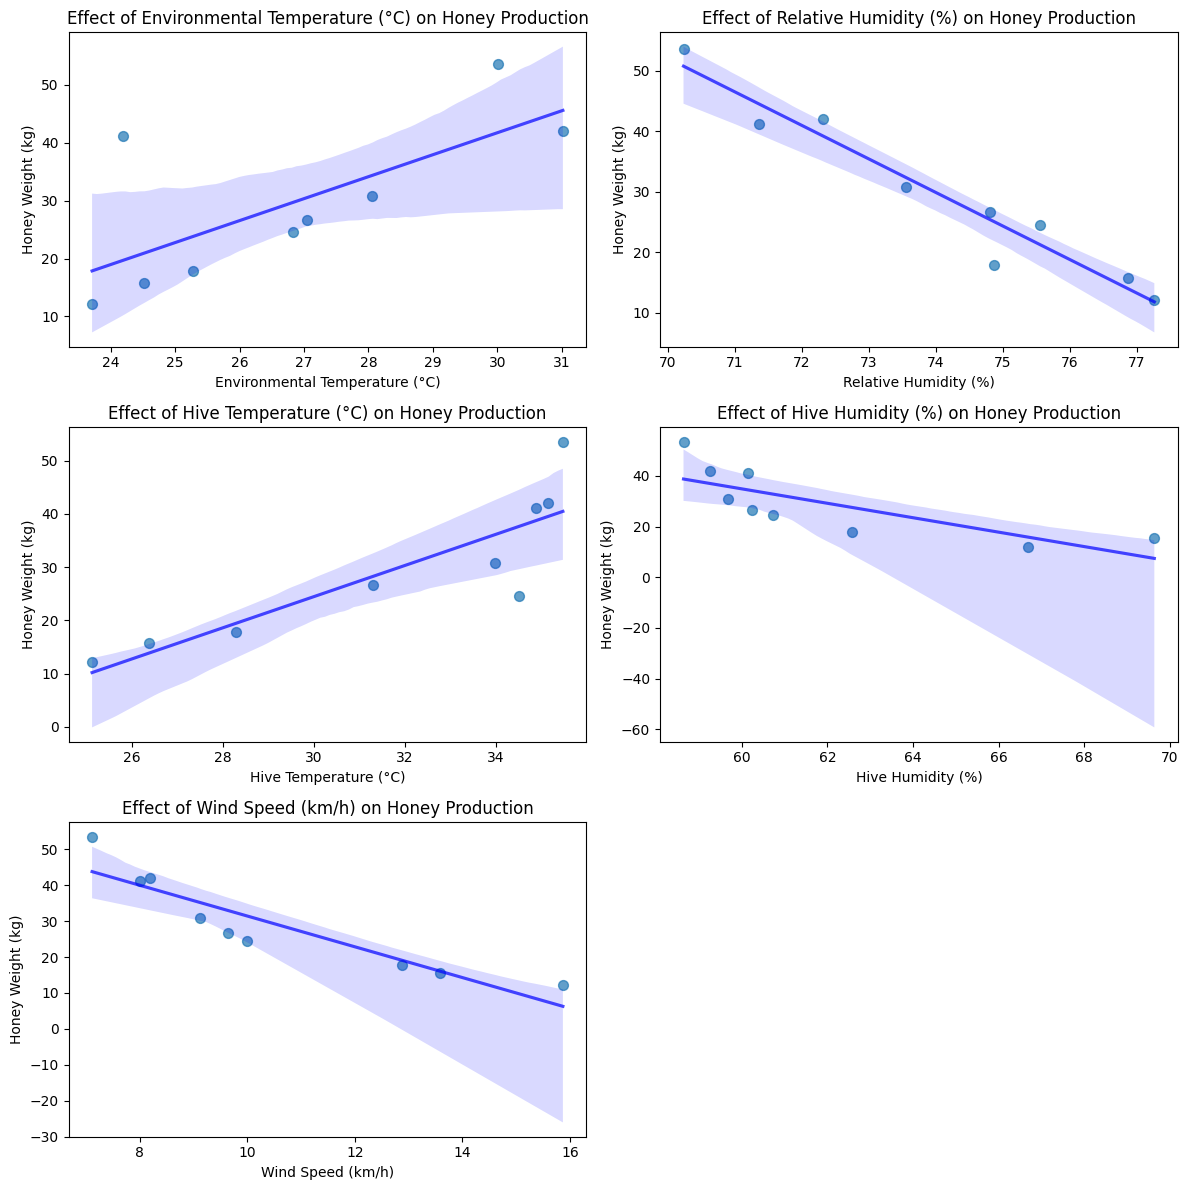

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Variables to analyze in relation to honey production
variables = [
    "Environmental Temperature (°C)",
    "Relative Humidity (%)",
    "Hive Temperature (°C)",
    "Hive Humidity (%)",
    "Wind Speed (km/h)",
]

# Create subplots to analyze each variable in relation to honey production
fig, axes = plt.subplots(3, 2, figsize=(12, 12))
axes = axes.flatten()

for i, var in enumerate(variables):
    sns.regplot(
        x=var,
        y="Honey Weight (kg)",
        data=df,
        ax=axes[i],
        scatter_kws={"s": 50, "alpha": 0.7},
        line_kws={"color": "blue", "alpha": 0.7},
    )
    axes[i].set_title(f"Effect of {var} on Honey Production")
    axes[i].set_xlabel(var)
    axes[i].set_ylabel("Honey Weight (kg)")

# Remove empty subplots if necessary
if len(variables) % 2 != 0:
    fig.delaxes(axes[-1])

plt.tight_layout()
plt.show()


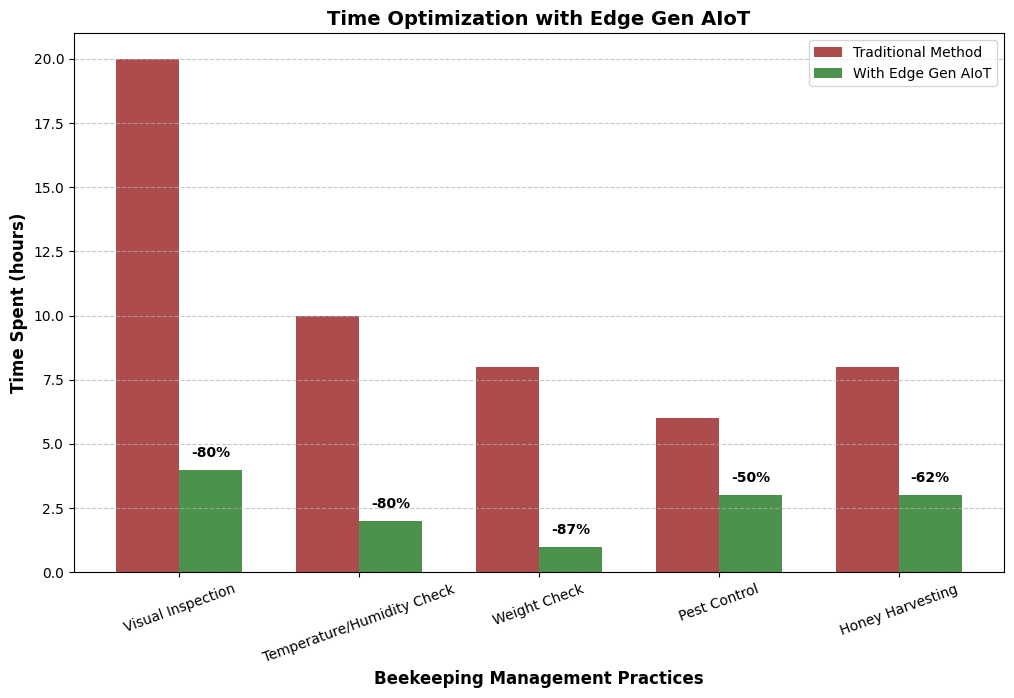

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Data for beekeeping management practices
practices_en = ["Visual Inspection", "Temperature/Humidity Check", "Weight Check", "Pest Control", "Honey Harvesting"]
traditional_times_en = [20, 10, 8, 6, 8]  # Hours in a traditional system
gen_aiot_times_en = [4, 2, 1, 3, 3]  # Hours with Edge Gen AIoT

# Create bar chart
x = np.arange(len(practices_en))
width = 0.35

fig, ax = plt.subplots(figsize=(12, 7))
ax.bar(x - width/2, traditional_times_en, width, label="Traditional Method", alpha=0.7, color='darkred')
ax.bar(x + width/2, gen_aiot_times_en, width, label="With Edge Gen AIoT", alpha=0.7, color='darkgreen')

# Enhancing storytelling with better labels and annotations
ax.set_xlabel("Beekeeping Management Practices", fontsize=12, fontweight='bold')
ax.set_ylabel("Time Spent (hours)", fontsize=12, fontweight='bold')
ax.set_title("Time Optimization with Edge Gen AIoT", fontsize=14, fontweight='bold')
ax.set_xticks(x)
ax.set_xticklabels(practices_en, rotation=20, fontsize=10)
ax.legend()

# Annotating the reduction percentages for better storytelling
for i in range(len(practices_en)):
    reduction = 100 * (1 - (gen_aiot_times_en[i] / traditional_times_en[i]))
    ax.text(i + width/2, gen_aiot_times_en[i] + 0.5, f"-{int(reduction)}%", ha='center', fontsize=10, fontweight='bold', color='black')

# Show chart
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()
